<a href="https://colab.research.google.com/github/abhishek01bv/LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.describe(include='O')

,diagnosis
count,569
unique,2
top,B
freq,357


In [7]:
df.value_counts('diagnosis')

,count
diagnosis,
B,357
M,212


In [8]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
df.duplicated().sum()
df.drop('id', axis=1,inplace=True)

<Axes: >

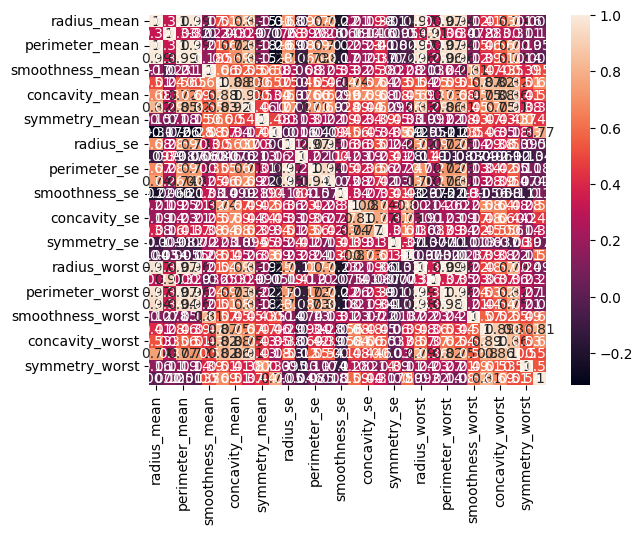

In [10]:
sns.heatmap(df.drop('diagnosis',axis=1).corr(),annot=True)

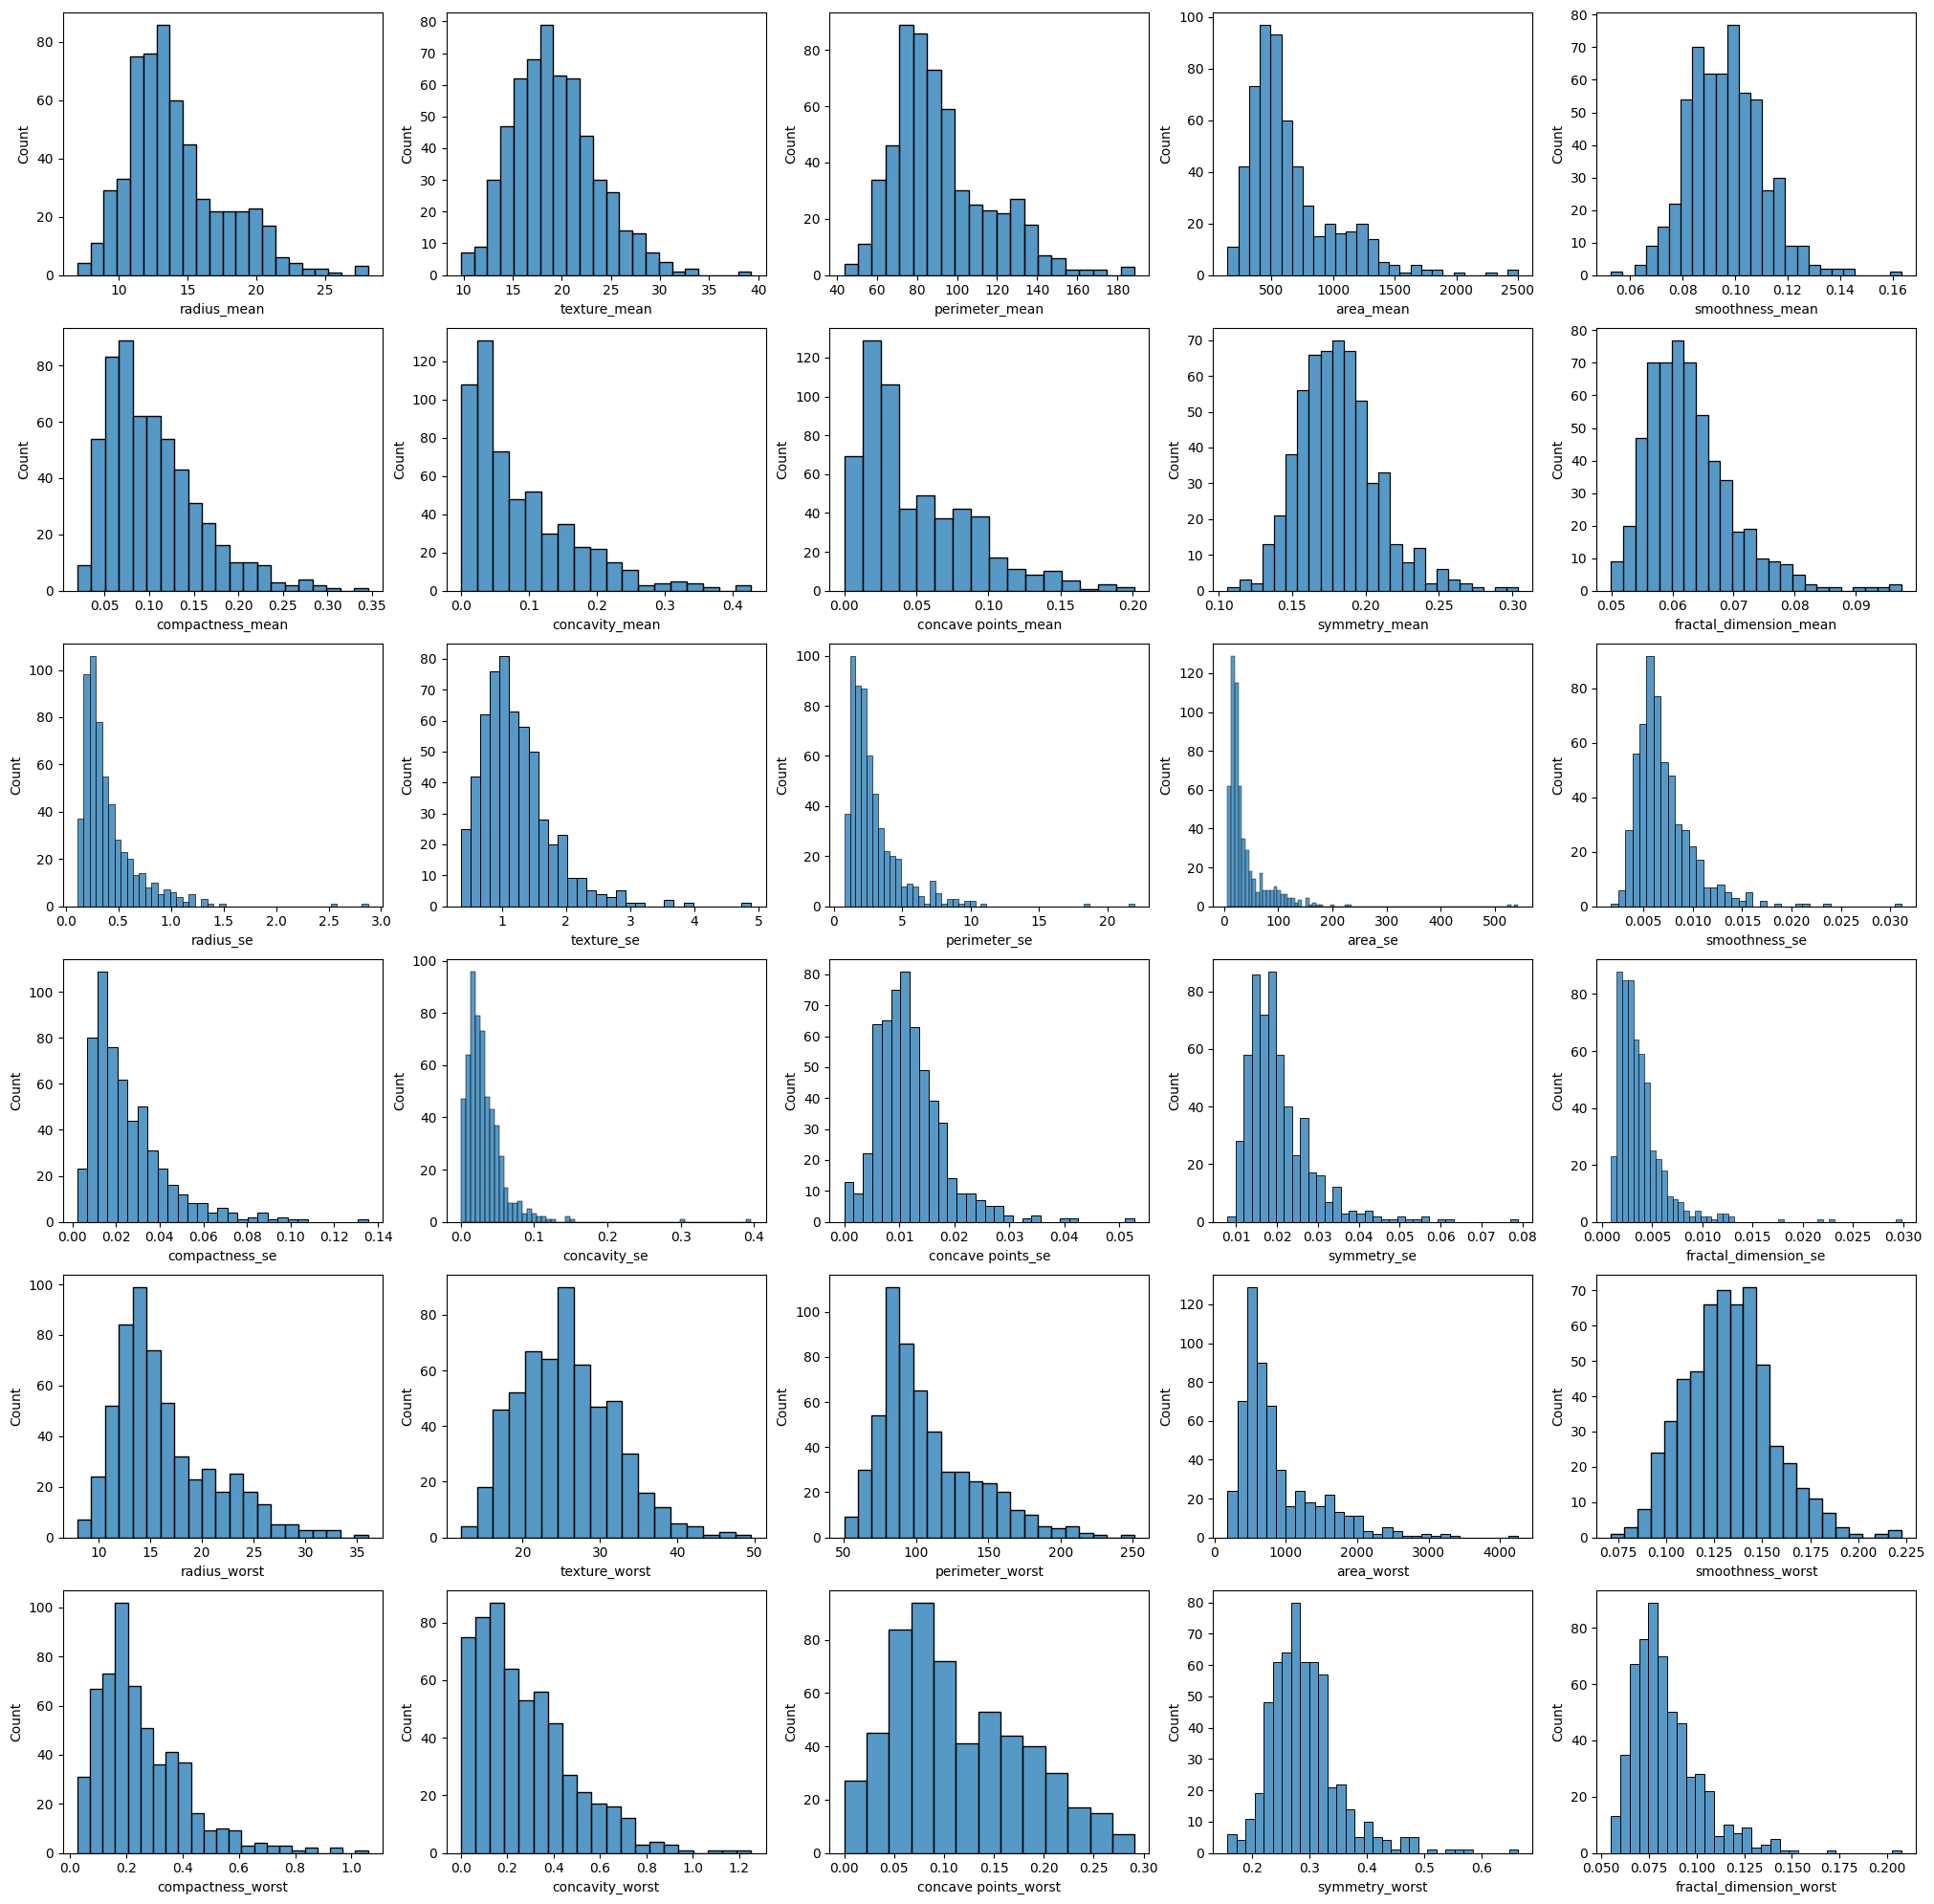

In [11]:
plt.figure(figsize=(25,25))
plotnumber =1

for column in df.drop('diagnosis', axis=1):
  plt.subplot(6,5,plotnumber)
  sns.histplot(df[column])
  plotnumber+=1
plt.show()

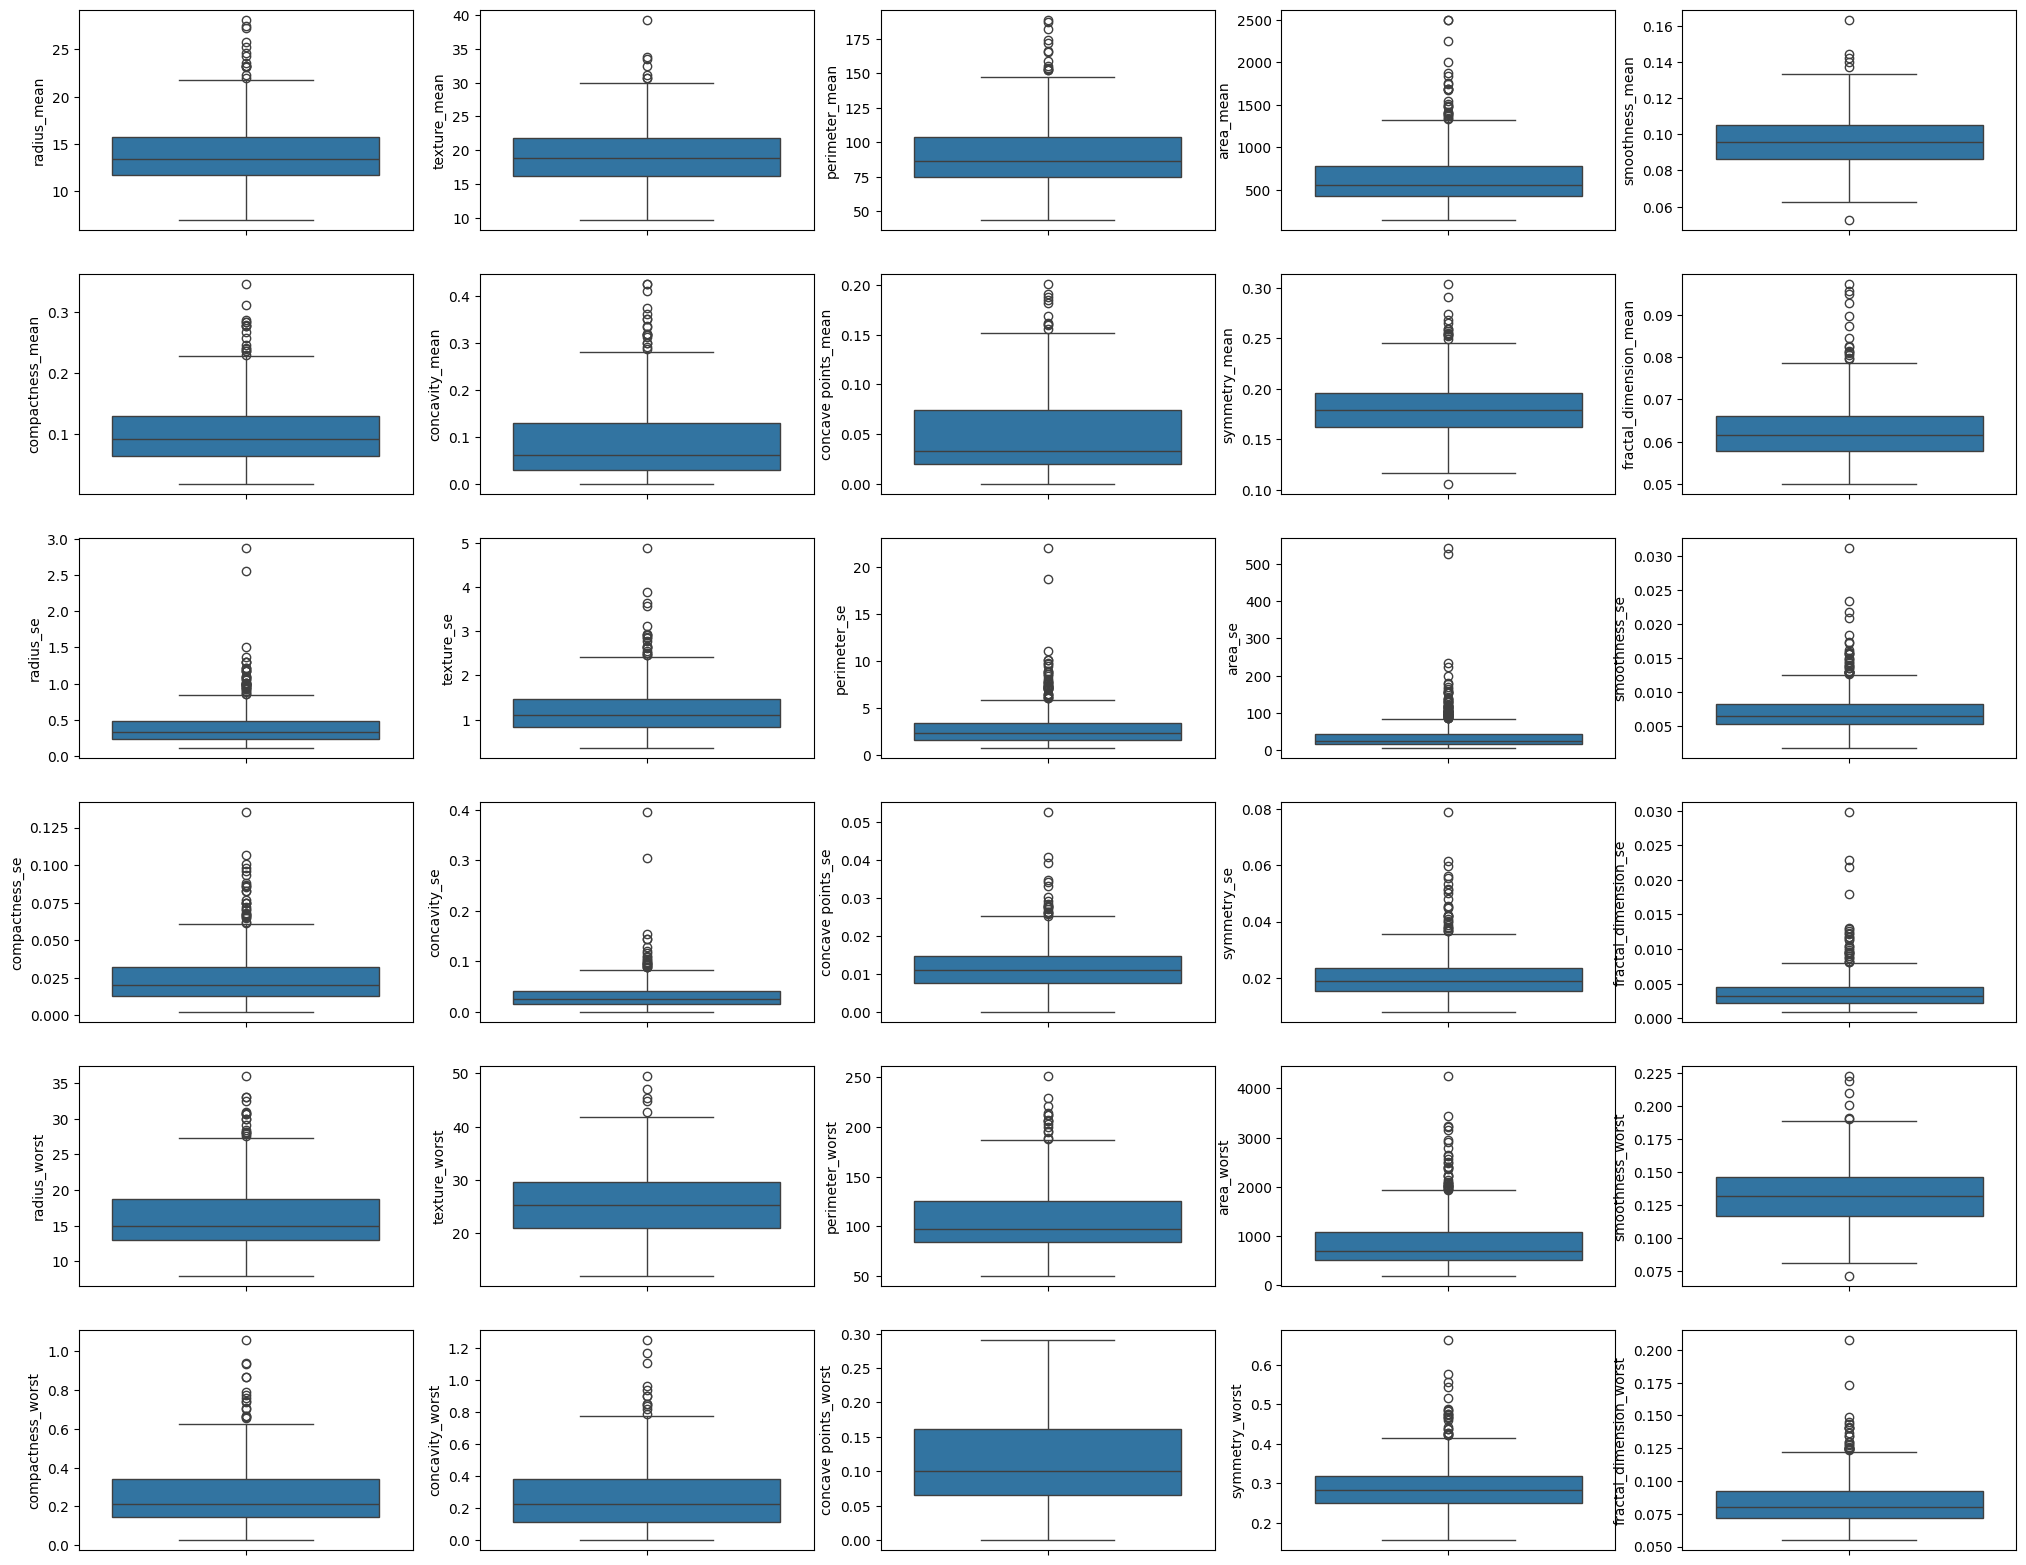

In [12]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df.drop('diagnosis', axis=1):
  plt.subplot(6,5,plotnumber)
  sns.boxplot(df[column])
  plotnumber+=1

plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
df1 = scaler.fit_transform(df.drop('diagnosis',axis=1))

In [18]:
df2 = pd.DataFrame(df1, columns = df.drop('diagnosis',axis=1).columns)

In [20]:
for column in df2:
  df2[column]=(df2[column])**(1/2)

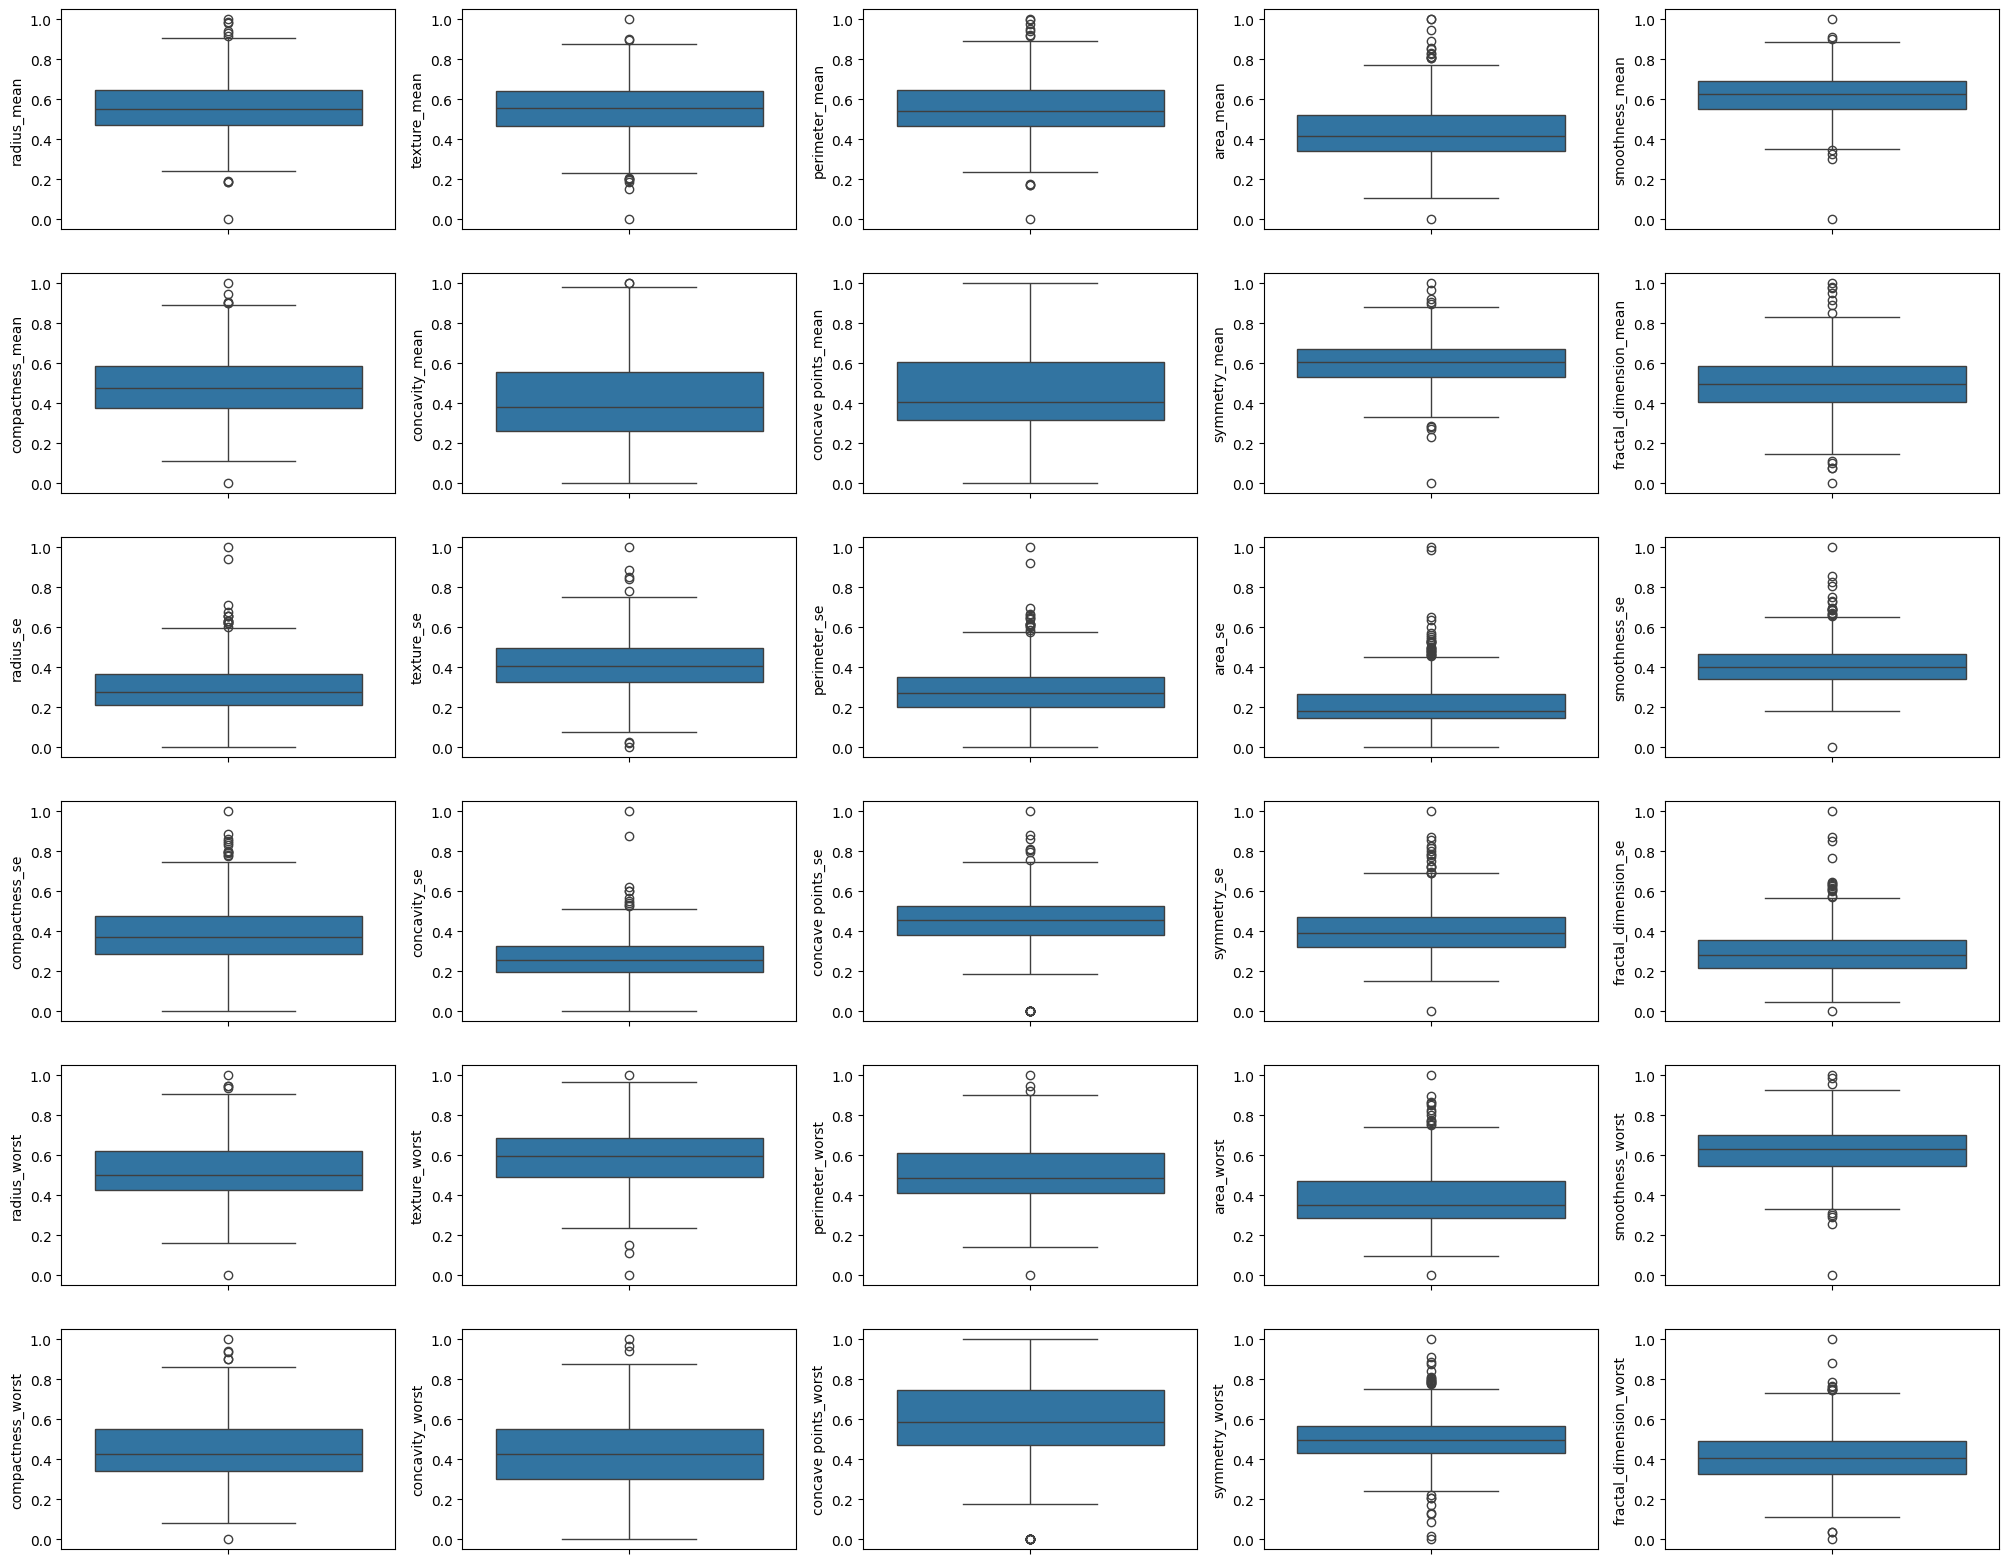

In [25]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df2:
  plt.subplot(6,5,plotnumber)
  sns.boxplot(df2[column])
  plotnumber+=1

plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['diagnosis'])
y.shape

(569,)

In [32]:
X = df2.iloc[:,:]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.721829,0.150526,0.738910,0.603103,0.770554,0.889965,0.838534,0.855052,0.828471,0.778150,...,0.787893,0.376197,0.817502,0.671340,0.775330,0.786951,0.754062,0.955001,0.773604,0.647197
1,0.801963,0.522086,0.784719,0.708231,0.538405,0.426343,0.451230,0.590557,0.616278,0.375929,...,0.779039,0.550973,0.734723,0.659708,0.589537,0.393145,0.439285,0.799484,0.483311,0.472100
2,0.775561,0.624708,0.771844,0.670386,0.717153,0.656518,0.680082,0.797299,0.713860,0.459616,...,0.745913,0.600062,0.713051,0.611971,0.695406,0.620786,0.599787,0.913812,0.635379,0.461988
3,0.458356,0.600698,0.483220,0.320789,0.900733,0.900756,0.752067,0.723093,0.881058,1.000000,...,0.498307,0.621231,0.491270,0.306607,0.956803,0.902226,0.740704,0.940680,1.000000,0.879609
4,0.793658,0.395699,0.794346,0.699492,0.656012,0.589824,0.681115,0.719993,0.615047,0.432222,...,0.720933,0.352042,0.712002,0.584444,0.661335,0.415229,0.565233,0.747275,0.396863,0.377617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.830662,0.654838,0.823813,0.752655,0.725912,0.544110,0.755951,0.830878,0.579969,0.363395,...,0.789472,0.619082,0.759061,0.672803,0.679071,0.422525,0.572744,0.872647,0.312371,0.325065
565,0.788873,0.791825,0.777197,0.688490,0.638578,0.507656,0.580857,0.697589,0.591181,0.336304,...,0.748769,0.836118,0.721729,0.616373,0.547729,0.399996,0.506744,0.747964,0.445535,0.272607
566,0.674723,0.788186,0.667674,0.550561,0.536810,0.504322,0.465567,0.513341,0.517375,0.370568,...,0.626976,0.767476,0.616400,0.480345,0.531203,0.523168,0.521349,0.698058,0.358777,0.389755
567,0.802848,0.814561,0.815805,0.689722,0.767031,0.888930,0.907379,0.869176,0.821738,0.652259,...,0.795979,0.854563,0.817502,0.634062,0.787163,0.903193,0.865887,0.954281,0.705083,0.672544


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred =clf.predict(X_test)


In [38]:
y_pred_prob = clf.predict_proba(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score,precision_score,f1_score

In [40]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[71,  0],
       [ 2, 41]])

In [41]:
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [42]:
print(f1_score(y_test,y_pred))

0.9761904761904763


In [44]:
print(recall_score(y_test,y_pred))

0.9534883720930233


In [45]:
print(precision_score(y_test,y_pred))

1.0


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Conclusion:
The model performance appears to be very good based on these metrics. The precision, recall, and F1-score are all very high for both classes, and the overall accuracy is 98%. This suggests that the model is performing well with a good balance between precision and recall.